In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import seaborn as sns
import math, time
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'
import gc
import plotly.io as pio
pio.renderers.default = "notebook_connected"
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None

In [2]:
key = "9e75e79c055470945cddfc527587d6ea600f5348"
#Google's initial public offering (IPO) took place on August 19, 2004.
df = pdr.get_data_tiingo('GOOGL',start='August 19, 2004', api_key=key)
df.to_csv('GOOGL.csv')

d:\Software\miniconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



In [3]:
df=pd.read_csv('GOOGL.csv')

In [4]:
df

symbol                       date    close    high      low    open  \
0     GOOGL  2004-08-19 00:00:00+00:00  100.335  104.06   95.960  100.01   
1     GOOGL  2004-08-20 00:00:00+00:00  108.310  109.08  100.500  101.01   
2     GOOGL  2004-08-23 00:00:00+00:00  109.400  113.48  109.050  110.76   
3     GOOGL  2004-08-24 00:00:00+00:00  104.870  111.60  103.570  111.24   
4     GOOGL  2004-08-25 00:00:00+00:00  106.000  108.00  103.880  104.76   
...     ...                        ...      ...     ...      ...     ...   
4595  GOOGL  2022-11-17 00:00:00+00:00   98.360   99.28   96.790   96.97   
4596  GOOGL  2022-11-18 00:00:00+00:00   97.430   98.90   96.370   98.77   
4597  GOOGL  2022-11-21 00:00:00+00:00   95.600   98.40   95.355   97.29   
4598  GOOGL  2022-11-22 00:00:00+00:00   97.050   97.22   94.050   95.95   
4599  GOOGL  2022-11-23 00:00:00+00:00   98.460   98.76   97.090   97.09   

        volume   adjClose    adjHigh     adjLow    adjOpen   adjVolume  \
0     44659000   2.516142   2.609555   2.406428   2.507992  1780845677   
1     22834300   2.716134   2.735444   2.520280   2.533069   910552508   
2     18256100   2.743469   2.845785   2.734692   2.777574   727989806   
3     15247300   2.629868   2.798639   2.597268   2.789611   608009321   
4      9188600   2.658206   2.708360   2.605042   2.627110   366409426   
...        ...        ...        ...        ...        ...         ...   
4595  26052599  98.360000  99.280000  96.790000  96.970000    26052599   
4596  28342297  97.430000  98.900000  96.370000  98.770000    28342297   
4597  21647387  95.600000  98.400000  95.355000  97.290000    21647387   
4598  23438480  97.050000  97.220000  94.050000  95.950000    23438480   
4599  18868092  98.460000  98.760000  97.090000  97.090000    18868092   

      divCash  splitFactor  
0         0.0          1.0  
1         0.0          1.0  
2         0.0          1.0  
3         0.0          1.0  
4         0.0          1.0  
...       ...          ...  
4595      0.0          1.0  
4596      0.0          1.0  
4597      0.0          1.0  
4598      0.0          1.0  
4599      0.0          1.0  

[4600 rows x 14 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       4600 non-null   object 
 1   date         4600 non-null   object 
 2   close        4600 non-null   float64
 3   high         4600 non-null   float64
 4   low          4600 non-null   float64
 5   open         4600 non-null   float64
 6   volume       4600 non-null   int64  
 7   adjClose     4600 non-null   float64
 8   adjHigh      4600 non-null   float64
 9   adjLow       4600 non-null   float64
 10  adjOpen      4600 non-null   float64
 11  adjVolume    4600 non-null   int64  
 12  divCash      4600 non-null   float64
 13  splitFactor  4600 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 503.2+ KB


# Data Cleaning

In [6]:
#removing the timestap
df['date'] = df['date'].str.split(' ').str[0]

In [7]:
df

symbol        date    close    high      low    open    volume  \
0     GOOGL  2004-08-19  100.335  104.06   95.960  100.01  44659000   
1     GOOGL  2004-08-20  108.310  109.08  100.500  101.01  22834300   
2     GOOGL  2004-08-23  109.400  113.48  109.050  110.76  18256100   
3     GOOGL  2004-08-24  104.870  111.60  103.570  111.24  15247300   
4     GOOGL  2004-08-25  106.000  108.00  103.880  104.76   9188600   
...     ...         ...      ...     ...      ...     ...       ...   
4595  GOOGL  2022-11-17   98.360   99.28   96.790   96.97  26052599   
4596  GOOGL  2022-11-18   97.430   98.90   96.370   98.77  28342297   
4597  GOOGL  2022-11-21   95.600   98.40   95.355   97.29  21647387   
4598  GOOGL  2022-11-22   97.050   97.22   94.050   95.95  23438480   
4599  GOOGL  2022-11-23   98.460   98.76   97.090   97.09  18868092   

       adjClose    adjHigh     adjLow    adjOpen   adjVolume  divCash  \
0      2.516142   2.609555   2.406428   2.507992  1780845677      0.0   
1      2.716134   2.735444   2.520280   2.533069   910552508      0.0   
2      2.743469   2.845785   2.734692   2.777574   727989806      0.0   
3      2.629868   2.798639   2.597268   2.789611   608009321      0.0   
4      2.658206   2.708360   2.605042   2.627110   366409426      0.0   
...         ...        ...        ...        ...         ...      ...   
4595  98.360000  99.280000  96.790000  96.970000    26052599      0.0   
4596  97.430000  98.900000  96.370000  98.770000    28342297      0.0   
4597  95.600000  98.400000  95.355000  97.290000    21647387      0.0   
4598  97.050000  97.220000  94.050000  95.950000    23438480      0.0   
4599  98.460000  98.760000  97.090000  97.090000    18868092      0.0   

      splitFactor  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
...           ...  
4595          1.0  
4596          1.0  
4597          1.0  
4598          1.0  
4599          1.0  

[4600 rows x 14 columns]

In [8]:
df = df.reset_index()[['date', 'adjClose']]
df_dates = df.iloc[:,0]
df['date'] = pd.to_datetime(df['date'])

In [9]:
df = df.set_index('date')

In [10]:
df

adjClose
date                 
2004-08-19   2.516142
2004-08-20   2.716134
2004-08-23   2.743469
2004-08-24   2.629868
2004-08-25   2.658206
...               ...
2022-11-17  98.360000
2022-11-18  97.430000
2022-11-21  95.600000
2022-11-22  97.050000
2022-11-23  98.460000

[4600 rows x 1 columns]

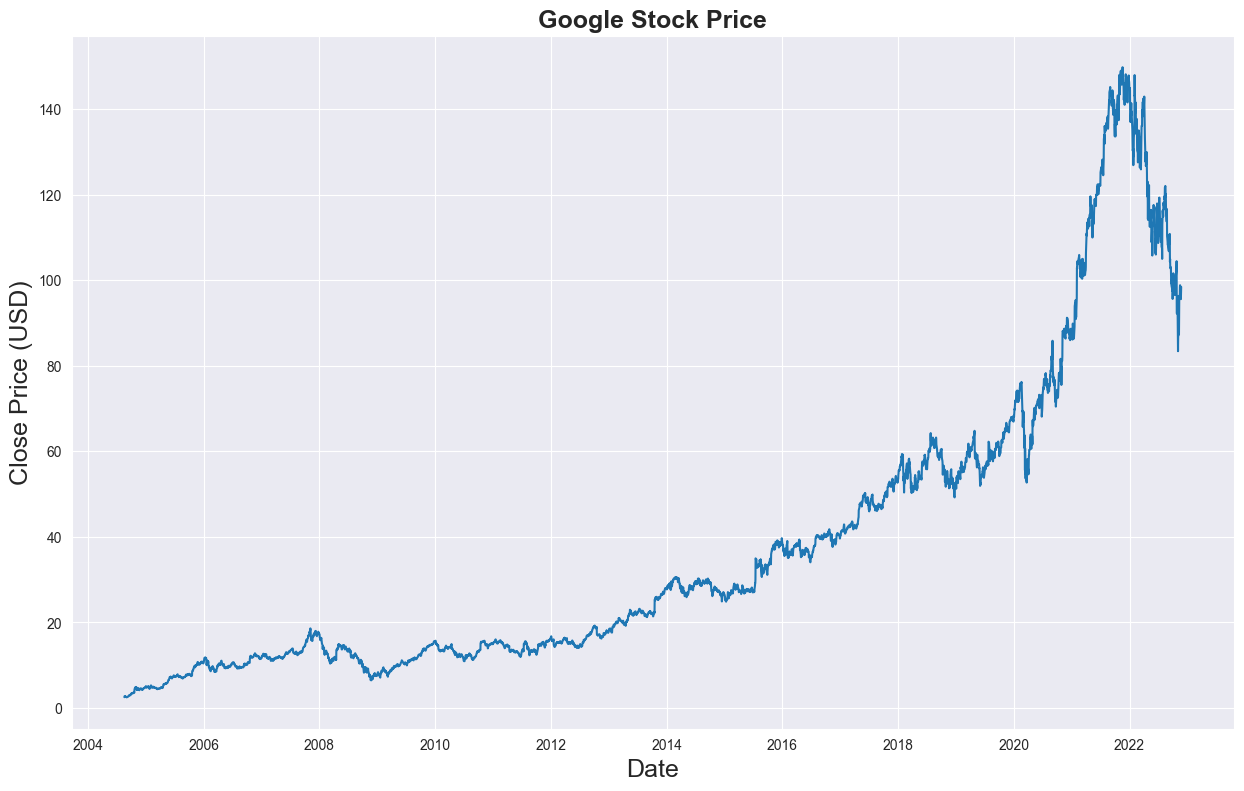

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize = (15, 9))
plt.plot(df[['adjClose']])
plt.title("Google Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

In [12]:
#array of original prices data
df_prices = df['adjClose'].values.reshape(-1,1)

In [13]:
df_prices

array([[ 2.51614209],
       [ 2.71613445],
       [ 2.74346883],
       ...,
       [95.6       ],
       [97.05      ],
       [98.46      ]])

In [14]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def torch_data(data, device):
    """Move data to a device"""
    return to_device(torch.from_numpy(data).type(torch.Tensor), device)

In [15]:
device = get_default_device()
device

device(type='cuda')

In [16]:
# convert an array of values into sequences according to window size
def create_sequence(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step -1):
		a = dataset.iloc[i:(i + time_step)]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset.iloc[i + time_step])
	return np.array(dataX), np.array(dataY)

In [17]:
# convert an array of values into a dataset matrix
def curate_dataset(dataset, time_step):

	##splitting dataset into train valid test split
	train_size = round(len(dataset) * 0.80)
	remaining_size = len(dataset) - train_size
	val_size = round(0.50 * remaining_size)
	train_data, val_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:(train_size + val_size), :], dataset.iloc[(train_size + val_size):len(dataset), :]

	#scaling the data between 0 to 1
	scaler = MinMaxScaler(feature_range = (0, 1))
	train_data['adjClose'] = scaler.fit_transform(np.array(train_data['adjClose']).reshape(-1, 1))
	#making sure test data does not leak
	val_data['adjClose'] = scaler.transform(np.array(val_data['adjClose']).reshape(-1, 1))
	test_data['adjClose'] = scaler.transform(np.array(test_data['adjClose']).reshape(-1, 1))

	X_train, y_train = create_sequence(train_data, time_step)
	X_val, y_val = create_sequence(val_data, time_step)
	X_test, y_test = create_sequence(test_data, time_step)	
	
	# reshape input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_val = y_val.reshape(y_val.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_val, X_test, y_train, y_val, y_test, scaler

In [18]:
# convert an array of values into a dataset matrix
def curate_dataset_test(dataset, time_step):

	##splitting dataset into train  test split
	train_size = round(len(dataset) * 0.90)
	train_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:, :]

	#scaling the data between 0 to 1
	scaler = MinMaxScaler(feature_range = (0, 1))
	train_data['adjClose'] = scaler.fit_transform(np.array(train_data['adjClose']).reshape(-1, 1))
	#making sure test data does not leak
	test_data['adjClose'] = scaler.transform(np.array(test_data['adjClose']).reshape(-1, 1))

	X_train, y_train = create_sequence(train_data, time_step)
	X_test, y_test = create_sequence(test_data, time_step)
	
	# reshape input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_test, y_train, y_test, scaler

In [19]:
# Create a base (or vanilla) RNN Model
class RNN_base(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_base, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first = True, nonlinearity = 'tanh')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

In [20]:
# function to train the model
def fit(num_epochs, lr, model, loss_type, opt_func, X_train, y_train):
    optimiser = opt_func(model.parameters(), lr)
    hist = np.zeros(num_epochs)
    start_time = time.time()
    for t in range(num_epochs):
        y_train_pred = model(X_train)
        loss = loss_type(y_train_pred, y_train)
        print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()       

        # Reset gradients
        optimiser.zero_grad()     

        # Compute gradients
        loss.backward()

        # Update parameters           
        optimiser.step()        
        
    training_time = time.time()-start_time
    print("Training time: {}".format(training_time))
    print()
    
    return hist, y_train_pred

In [21]:
# to plot the loss curve
def plot_loss(history):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(8, 5))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    ax = sns.lineplot(data = history, color='royalblue')
    ax.set_xlabel("Epoch", size = 14)
    ax.set_ylabel("Loss", size = 14)
    ax.set_title("Training Loss", size = 14, fontweight='bold')

In [22]:
#produce dynamic prediction plots
def plotly_predictions(results):  
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[0],
                        mode='lines',
                        name='Train prediction',
                        line = dict(color='#ff7f0e'))))
    fig.add_trace(go.Scatter(x=results['date'], y=results[1],
                        mode='lines',
                        name='Test prediction',
                        line = dict(color='#d62728')))
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[2],
                        opacity=0.6,
                        mode='lines',
                        name='Actual Value',
                        line = dict(color='#1f77b4'))))
    fig.update_layout(
        xaxis=dict(
            title_text='Dates',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        yaxis=dict(
            title_text='Close (USD)',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        showlegend=True,
        template = 'plotly_white'

    )

    annotations = []
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                                xanchor='left', yanchor='bottom',
                                text='Results',
                                font=dict(family='Rockwell',
                                            size=26,
                                            color='black'),
                                showarrow=False))
    fig.update_layout(annotations=annotations)

    fig.show()

In [23]:
#run function to evaluate the models in experiments
def evaluate_model_experiments(model, num_epochs, lr, loss_type, optimiser, time_step):  
    
    X_train, X_val, X_test, y_train, y_val, y_test, scaler = curate_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device) 
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred
  
    original = df[0 : end_of_time]
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)

    #getting and appending the results to the results list
    metadata = [[time_step, model.layer_dim, model.hidden_dim, trainScore, valScore]]
    metadata = pd.DataFrame(metadata, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'])   
        
    return metadata

In [24]:
#run function to evaluate a single model
def evaluate_single_model(model, num_epochs, lr, loss_type, optimiser, time_step):  
    
    X_train, X_val, X_test, y_train, y_val, y_test, scaler = curate_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device) 
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred


    original = df[0 : end_of_time]    
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
    plot_loss(history)
    plotly_predictions(result)    
    return None

In [25]:
#run function to evaluate the final model
def test_final_model(model, num_epochs, lr, loss_type, optimiser, time_step):  
    
    X_train, X_test, y_train, y_test, scaler = curate_dataset_test(df, time_step)
    X_train = torch_data(X_train, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device) 
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_test_pred = model(X_test)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_test_pred = scaler.inverse_transform(y_test_pred.cpu().detach().numpy())
    y_test = scaler.inverse_transform(y_test.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    testScore = math.sqrt(mean_squared_error(y_test, y_test_pred))
    print('Test Score: %.2f RMSE' % (testScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_test_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_test_pred

   
    original = df[0 : end_of_time]    
    predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
    plot_loss(history)
    plotly_predictions(result)    
    return None

## Vanilla RNN

Epoch  0 MSE:  0.1769380122423172
Epoch  1 MSE:  0.1637599766254425
Epoch  2 MSE:  0.15144476294517517
Epoch  3 MSE:  0.14000454545021057
Epoch  4 MSE:  0.12944722175598145
Epoch  5 MSE:  0.11977575719356537
Epoch  6 MSE:  0.11098756641149521
Epoch  7 MSE:  0.10307387262582779
Epoch  8 MSE:  0.09601917117834091
Epoch  9 MSE:  0.08980081975460052
Epoch  10 MSE:  0.0843886286020279
Epoch  11 MSE:  0.07974502444267273
Epoch  12 MSE:  0.07582518458366394
Epoch  13 MSE:  0.07257778942584991
Epoch  14 MSE:  0.06994602829217911
Epoch  15 MSE:  0.06786908954381943
Epoch  16 MSE:  0.06628372520208359
Epoch  17 MSE:  0.06512604653835297
Epoch  18 MSE:  0.06433314085006714
Epoch  19 MSE:  0.06384444981813431
Epoch  20 MSE:  0.06360287219285965
Epoch  21 MSE:  0.06355545669794083
Epoch  22 MSE:  0.06365388631820679
Epoch  23 MSE:  0.06385477632284164
Epoch  24 MSE:  0.06411982327699661
Epoch  25 MSE:  0.06441592425107956
Epoch  26 MSE:  0.064715176820755
Epoch  27 MSE:  0.06499485671520233
Epoch  

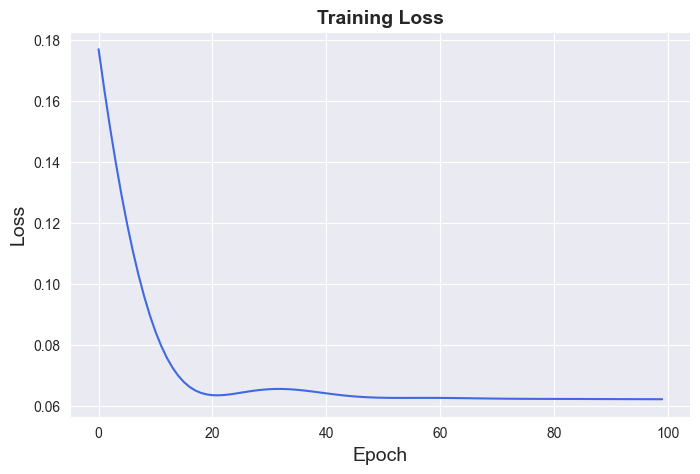

In [26]:
#parameters for vanilla RNN
input_dim = 1
hidden_dim = 1
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(42)
vanilla_rnn = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
vanilla_rnn = to_device(vanilla_rnn, device)

#training and evaluating model
evaluate_single_model(vanilla_rnn, num_epochs, lr, loss_type, optimiser, time_step)

# Experiments with RNN

## Using ReLU as the non-linearity in RNN

In [27]:
# RNN model with relu as nonlinearity
class RNN_relu(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_relu, self).__init__()
        
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first = True, nonlinearity = 'relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

Epoch  0 MSE:  1.954759955406189
Epoch  1 MSE:  1.5666656494140625
Epoch  2 MSE:  1.2596317529678345
Epoch  3 MSE:  1.0172398090362549
Epoch  4 MSE:  0.8259379267692566
Epoch  5 MSE:  0.6747797131538391
Epoch  6 MSE:  0.555070161819458
Epoch  7 MSE:  0.4599820077419281
Epoch  8 MSE:  0.3841939866542816
Epoch  9 MSE:  0.3235739469528198
Epoch  10 MSE:  0.2749161720275879
Epoch  11 MSE:  0.235730841755867
Epoch  12 MSE:  0.20407913625240326
Epoch  13 MSE:  0.1784457117319107
Epoch  14 MSE:  0.15764103829860687
Epoch  15 MSE:  0.14072701334953308
Epoch  16 MSE:  0.12696005403995514
Epoch  17 MSE:  0.11574779450893402
Epoch  18 MSE:  0.10661597549915314
Epoch  19 MSE:  0.09918304532766342
Epoch  20 MSE:  0.09314051270484924
Epoch  21 MSE:  0.08823791891336441
Epoch  22 MSE:  0.08427098393440247
Epoch  23 MSE:  0.08107247948646545
Epoch  24 MSE:  0.0785050019621849
Epoch  25 MSE:  0.07645527273416519
Epoch  26 MSE:  0.07482966035604477
Epoch  27 MSE:  0.07355058193206787
Epoch  28 MSE:  0.0

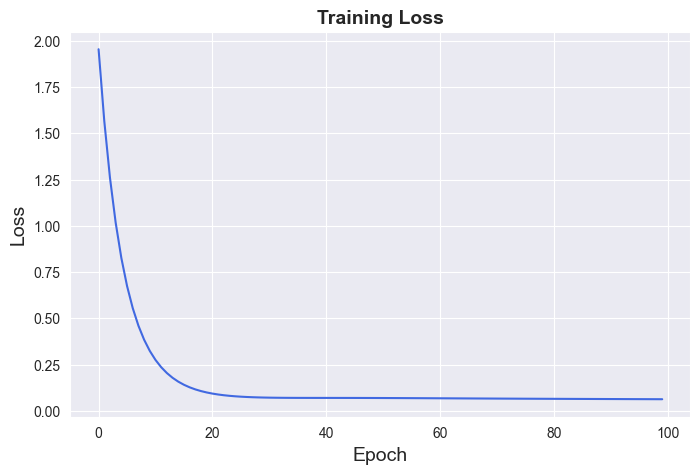

In [28]:
#parameters for RNN
input_dim = 1
hidden_dim = 1
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(42)
relu_rnn = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
relu_rnn = to_device(relu_rnn, device)

#training and evaluating model
evaluate_single_model(relu_rnn, num_epochs, lr, loss_type, optimiser, time_step)

## Hyperparameter Tuning with RNN

In [29]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

tanh_results = []
relu_results = []
for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the tanh RNN model
            torch.manual_seed(42)
            tanh_rnn = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            tanh_rnn = to_device(tanh_rnn, device)
            #training and evaluating model
            tanh_res = evaluate_model_experiments(tanh_rnn, num_epochs, lr, loss_type, optimiser, time_step)
            tanh_results += [tanh_res.iloc[0]]
            print()

            #declaring the ReLU RNN model
            torch.manual_seed(42)
            relu_rnn_exp = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            relu_rnn_exp = to_device(relu_rnn_exp, device)
            #training and evaluating model
            relu_res = evaluate_model_experiments(relu_rnn_exp, num_epochs, lr, loss_type, optimiser, time_step)
            relu_results += [relu_res.iloc[0]]
            print()

Time Step = 20 | Hidden States = 2 | Num Layers = 1

Epoch  0 MSE:  0.20318560302257538
Epoch  1 MSE:  0.17353446781635284
Epoch  2 MSE:  0.1466338187456131
Epoch  3 MSE:  0.1225547045469284
Epoch  4 MSE:  0.10132244229316711
Epoch  5 MSE:  0.08291207998991013
Epoch  6 MSE:  0.06725005060434341
Epoch  7 MSE:  0.054219361394643784
Epoch  8 MSE:  0.04366738349199295
Epoch  9 MSE:  0.035413958132267
Epoch  10 MSE:  0.029257740825414658
Epoch  11 MSE:  0.02497929148375988
Epoch  12 MSE:  0.022340958938002586
Epoch  13 MSE:  0.02108517289161682
Epoch  14 MSE:  0.020933862775564194
Epoch  15 MSE:  0.021591681987047195
Epoch  16 MSE:  0.0227544866502285
Epoch  17 MSE:  0.02412337251007557
Epoch  18 MSE:  0.025423211976885796
Epoch  19 MSE:  0.02642323076725006
Epoch  20 MSE:  0.026955336332321167
Epoch  21 MSE:  0.026925403624773026
Epoch  22 MSE:  0.026314308866858482
Epoch  23 MSE:  0.0251687690615654
Epoch  24 MSE:  0.02358495257794857
Epoch  25 MSE:  0.021688906475901604
Epoch  26 MSE:  0

In [30]:
tanh_results = pd.DataFrame(tanh_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)
relu_results = pd.DataFrame(relu_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [31]:
tanh_results = tanh_results.sort_values('valScore', ascending=True, ignore_index = True)  
tanh_results

time_step  num_layers  hidden_dim  trainScore   valScore
0        20.0         1.0        32.0    0.584620   3.833782
1        30.0         1.0        32.0    0.584536   3.866277
2        50.0         1.0        32.0    0.585364   3.947468
3        20.0         2.0        32.0    0.569374   4.175972
4       100.0         1.0        32.0    0.589626   4.180090
5        30.0         2.0        32.0    0.574430   4.247991
6        50.0         2.0        32.0    0.575760   4.339213
7       100.0         2.0        32.0    0.578460   4.631623
8        20.0         1.0        16.0    0.668459   5.376113
9        30.0         1.0        16.0    0.671980   5.456024
10       50.0         1.0        16.0    0.675470   5.629653
11       20.0         1.0         8.0    0.648840   5.973928
12      100.0         1.0        16.0    0.679851   6.009022
13       30.0         1.0         8.0    0.647873   6.030348
14       50.0         1.0         8.0    0.647290   6.156865
15      100.0         1.0         8.0    0.641871   6.523744
16       20.0         2.0         8.0    0.625048   6.732469
17       20.0         1.0         2.0    0.610786   6.792558
18       30.0         2.0         8.0    0.625471   6.804671
19       20.0         1.0         4.0    0.707750   6.835182
20       30.0         1.0         2.0    0.610437   6.868669
21       30.0         1.0         4.0    0.708333   6.901690
22       50.0         2.0         8.0    0.625433   6.953918
23       50.0         1.0         2.0    0.610544   7.028288
24       50.0         1.0         4.0    0.712952   7.052006
25      100.0         2.0         8.0    0.624593   7.396041
26      100.0         1.0         4.0    0.720984   7.469253
27      100.0         1.0         2.0    0.611364   7.478361
28       20.0         2.0        16.0    0.938452   8.169752
29       30.0         2.0        16.0    0.938938   8.249030
30       50.0         2.0        16.0    0.942220   8.440041
31       20.0         2.0         4.0    0.832989   8.675272
32       30.0         2.0         4.0    0.828841   8.760193
33       50.0         2.0         4.0    0.822334   8.941960
34      100.0         2.0        16.0    0.950522   8.955413
35      100.0         2.0         4.0    0.807073   9.453700
36       20.0         2.0         2.0    3.973736  21.991909
37       30.0         2.0         2.0    3.970172  22.197413
38       50.0         2.0         2.0    3.962773  22.675762
39      100.0         2.0         2.0    3.945585  23.974416

In [32]:
relu_results = relu_results.sort_values('valScore', ascending=True, ignore_index = True)
relu_results

time_step  num_layers  hidden_dim  trainScore   valScore
0        20.0         2.0        32.0    0.497621   1.476011
1        20.0         1.0        16.0    0.670645   1.487197
2        30.0         1.0        16.0    0.660185   1.491500
3        50.0         1.0        16.0    0.647162   1.502353
4       100.0         1.0        16.0    0.628838   1.541722
5        20.0         1.0         2.0    1.863659   1.643068
6       100.0         2.0        32.0    0.496215   1.650048
7        30.0         1.0         2.0    1.835589   1.657360
8        50.0         1.0         2.0    1.789282   1.684427
9       100.0         2.0         8.0    0.541895   1.703261
10       50.0         2.0        32.0    0.528662   1.722167
11       30.0         2.0        32.0    0.525947   1.722340
12      100.0         1.0         2.0    1.690417   1.740412
13      100.0         2.0         2.0    0.650523   2.095385
14       50.0         2.0         2.0    0.642250   2.099077
15       30.0         2.0         2.0    0.640490   2.107124
16       20.0         2.0         2.0    0.641271   2.114981
17       20.0         2.0        16.0    0.693322   3.674861
18       20.0         1.0        32.0    0.537877   3.686423
19       30.0         2.0        16.0    0.701158   3.713123
20       50.0         2.0        16.0    0.706512   3.786338
21      100.0         2.0        16.0    0.722191   3.925943
22       30.0         1.0        32.0    0.490658   4.371955
23      100.0         1.0        32.0    0.515510   4.512938
24       50.0         1.0        32.0    0.500495   4.550852
25       20.0         2.0         4.0    0.476916   4.825614
26       30.0         2.0         4.0    0.475616   4.882895
27       50.0         2.0         4.0    0.476237   4.996421
28      100.0         2.0         4.0    0.485032   5.353008
29       50.0         2.0         8.0    0.515920   6.275019
30       20.0         1.0         8.0    0.528676   6.933671
31       30.0         1.0         8.0    0.529119   7.024954
32       50.0         1.0         8.0    0.530196   7.223825
33      100.0         1.0         8.0    0.531521   7.657939
34       20.0         2.0         8.0    0.519107   7.796551
35       30.0         2.0         8.0    0.518141   7.839674
36       20.0         1.0         4.0   15.406625  47.493395
37       30.0         1.0         4.0   15.392090  47.689092
38       50.0         1.0         4.0   15.367338  48.215142
39      100.0         1.0         4.0   15.314183  49.581449

In [33]:
best_rnn_model = relu_results.iloc[0]
best_rnn_model

time_step     20.000000
num_layers     2.000000
hidden_dim    32.000000
trainScore     0.497621
valScore       1.476011
Name: 0, dtype: float64

Epoch  0 MSE:  0.25940626859664917
Epoch  1 MSE:  0.12426736205816269
Epoch  2 MSE:  0.06216602772474289
Epoch  3 MSE:  0.09146943688392639
Epoch  4 MSE:  0.07694776356220245
Epoch  5 MSE:  0.054772354662418365
Epoch  6 MSE:  0.050894979387521744
Epoch  7 MSE:  0.05325363948941231
Epoch  8 MSE:  0.05429350957274437
Epoch  9 MSE:  0.05127192288637161
Epoch  10 MSE:  0.044545527547597885
Epoch  11 MSE:  0.036765601485967636
Epoch  12 MSE:  0.031446490436792374
Epoch  13 MSE:  0.030474090948700905
Epoch  14 MSE:  0.028363989666104317
Epoch  15 MSE:  0.02075703628361225
Epoch  16 MSE:  0.013597111217677593
Epoch  17 MSE:  0.010789810679852962
Epoch  18 MSE:  0.006061922293156385
Epoch  19 MSE:  0.0007901001372374594
Epoch  20 MSE:  0.008411858230829239
Epoch  21 MSE:  0.002551406854763627
Epoch  22 MSE:  0.007411486469209194
Epoch  23 MSE:  0.007755189668387175
Epoch  24 MSE:  0.003994086291640997
Epoch  25 MSE:  0.005517006851732731
Epoch  26 MSE:  0.004283368121832609
Epoch  27 MSE:  0.0

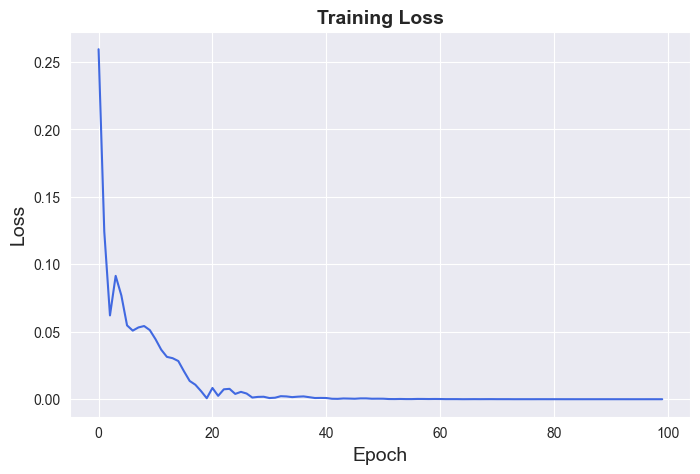

In [34]:
# Retraining our model with tuned parameters

#constant parameters as used in a vanilla RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_rnn_model['hidden_dim'])
num_layers = int(best_rnn_model['num_layers'])
time_step = int(best_rnn_model['time_step'])

#declaring the model
torch.manual_seed(42)
tuned_rnn = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tuned_rnn = to_device(tuned_rnn, device)

#training and evaluating model
evaluate_single_model(tuned_rnn, num_epochs, lr, loss_type, optimiser, time_step)

# LSTM Model

In [35]:
class LSTM_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTM_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [36]:
gc.collect()
torch.cuda.empty_cache()

Epoch  0 MSE:  0.15168538689613342
Epoch  1 MSE:  0.0798506960272789
Epoch  2 MSE:  0.05625925213098526
Epoch  3 MSE:  0.07737581431865692
Epoch  4 MSE:  0.058065928518772125
Epoch  5 MSE:  0.05057581886649132
Epoch  6 MSE:  0.051818713545799255
Epoch  7 MSE:  0.05294513702392578
Epoch  8 MSE:  0.050213757902383804
Epoch  9 MSE:  0.042781367897987366
Epoch  10 MSE:  0.031280651688575745
Epoch  11 MSE:  0.021304721012711525
Epoch  12 MSE:  0.030293134972453117
Epoch  13 MSE:  0.013235772959887981
Epoch  14 MSE:  0.0063452571630477905
Epoch  15 MSE:  0.010338311083614826
Epoch  16 MSE:  0.010654784739017487
Epoch  17 MSE:  0.00568431569263339
Epoch  18 MSE:  0.008465578779578209
Epoch  19 MSE:  0.010204115882515907
Epoch  20 MSE:  0.0035172048956155777
Epoch  21 MSE:  0.0014769406989216805
Epoch  22 MSE:  0.0029861517250537872
Epoch  23 MSE:  0.0038565138820558786
Epoch  24 MSE:  0.0036061902064830065
Epoch  25 MSE:  0.003365650773048401
Epoch  26 MSE:  0.0038345130160450935
Epoch  27 MS

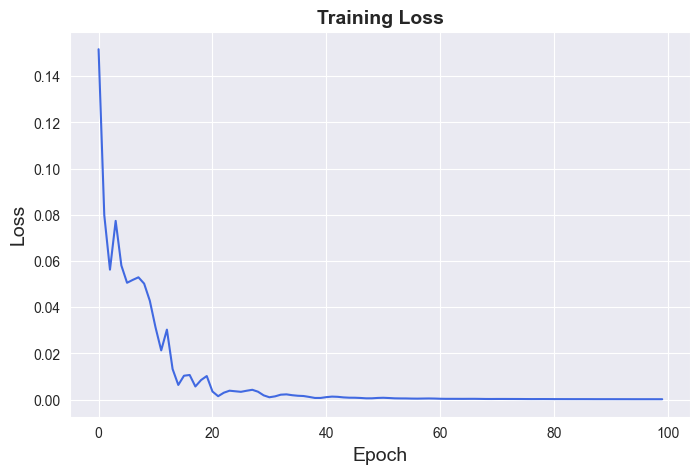

In [37]:
#parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_rnn_model['hidden_dim'])
num_layers = int(best_rnn_model['num_layers'])
time_step = int(best_rnn_model['time_step'])


#declaring the model
torch.manual_seed(42)
lstm_1 = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
lstm_1 = to_device(lstm_1, device)

#training and evaluating model
evaluate_single_model(lstm_1, num_epochs, lr, loss_type, optimiser, time_step)

In [38]:
gc.collect()
torch.cuda.empty_cache()

## Hyperparameter Tuning with LSTM

In [39]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

LSTM_results=[]

for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            gc.collect()
            torch.cuda.empty_cache()

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the model
            torch.manual_seed(42)
            lstm_exp = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            lstm_exp = to_device(lstm_exp, device)

            #training and evaluating model
            LSTM_res = evaluate_model_experiments(lstm_exp, num_epochs, lr, loss_type, optimiser, time_step)
            LSTM_results += [LSTM_res.iloc[0]]
            print()

Time Step = 20 | Hidden States = 2 | Num Layers = 1

Epoch  0 MSE:  0.06636566668748856
Epoch  1 MSE:  0.06524556875228882
Epoch  2 MSE:  0.06435034424066544
Epoch  3 MSE:  0.06352173537015915
Epoch  4 MSE:  0.06279732286930084
Epoch  5 MSE:  0.062154754996299744
Epoch  6 MSE:  0.06153283640742302
Epoch  7 MSE:  0.060891591012477875
Epoch  8 MSE:  0.06023436039686203
Epoch  9 MSE:  0.05957898497581482
Epoch  10 MSE:  0.05892987549304962
Epoch  11 MSE:  0.058277178555727005
Epoch  12 MSE:  0.05761614814400673
Epoch  13 MSE:  0.056953564286231995
Epoch  14 MSE:  0.05629931762814522
Epoch  15 MSE:  0.055658187717199326
Epoch  16 MSE:  0.05502649024128914
Epoch  17 MSE:  0.05439333990216255
Epoch  18 MSE:  0.05374476686120033
Epoch  19 MSE:  0.05306710675358772
Epoch  20 MSE:  0.05234726890921593
Epoch  21 MSE:  0.051570918411016464
Epoch  22 MSE:  0.050721824169158936
Epoch  23 MSE:  0.049784090369939804
Epoch  24 MSE:  0.04874507710337639
Epoch  25 MSE:  0.04759679362177849
Epoch  26 MSE

In [40]:
LSTM_results = pd.DataFrame(LSTM_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [41]:
LSTM_results = LSTM_results.sort_values('valScore', ascending=True, ignore_index = True)  
LSTM_results

time_step  num_layers  hidden_dim  trainScore   valScore
0        30.0         1.0        32.0    0.786677   5.824422
1        50.0         1.0        32.0    0.782189   5.894772
2        20.0         1.0        32.0    0.801801   5.938627
3       100.0         1.0        32.0    0.777336   6.200959
4        50.0         2.0        16.0    0.818050   6.449189
5        30.0         2.0        16.0    0.793435   6.828952
6        50.0         2.0         2.0    1.056557   7.393049
7        20.0         2.0        32.0    0.794690   7.419977
8        30.0         2.0         2.0    1.065179   7.468420
9        30.0         1.0        16.0    0.742186   7.470653
10       50.0         2.0        32.0    0.796327   7.532535
11      100.0         2.0        16.0    0.836586   7.568794
12       30.0         2.0        32.0    0.796740   7.582570
13       20.0         1.0        16.0    0.762352   7.584588
14       50.0         1.0        16.0    0.740078   7.616611
15       20.0         2.0        16.0    0.852712   7.629461
16      100.0         2.0         2.0    1.056293   7.660443
17      100.0         2.0        32.0    0.795151   7.809979
18       20.0         2.0         2.0    1.058507   7.914604
19       20.0         1.0         8.0    0.944003   8.013242
20       30.0         1.0         8.0    0.941527   8.065296
21      100.0         1.0        16.0    0.744890   8.174118
22       50.0         1.0         8.0    0.935210   8.214010
23      100.0         1.0         8.0    0.927429   8.731588
24       30.0         1.0         4.0    1.221652  10.527910
25       20.0         1.0         4.0    1.253394  10.676945
26       50.0         1.0         4.0    1.205857  10.679275
27      100.0         1.0         4.0    1.196730  11.391712
28       50.0         2.0         8.0    0.945471  11.981465
29       30.0         2.0         8.0    0.976034  12.112018
30       20.0         2.0         8.0    1.044774  12.573534
31      100.0         2.0         8.0    0.928257  12.790833
32       30.0         1.0         2.0    1.617088  14.467311
33       50.0         1.0         2.0    1.595439  14.497122
34       20.0         1.0         2.0    1.662445  14.504862
35      100.0         1.0         2.0    1.620685  15.228688
36       30.0         2.0         4.0    2.056009  16.105659
37       20.0         2.0         4.0    2.094139  16.227976
38       50.0         2.0         4.0    2.037347  16.352335
39      100.0         2.0         4.0    2.068972  17.561493

In [42]:
best_lstm_model = LSTM_results.iloc[0]
best_lstm_model

time_step     30.000000
num_layers     1.000000
hidden_dim    32.000000
trainScore     0.786677
valScore       5.824422
Name: 0, dtype: float64

Epoch  0 MSE:  0.19826748967170715
Epoch  1 MSE:  0.13285769522190094
Epoch  2 MSE:  0.08531855046749115
Epoch  3 MSE:  0.05227933079004288
Epoch  4 MSE:  0.04392969608306885
Epoch  5 MSE:  0.0656653419137001
Epoch  6 MSE:  0.05225776880979538
Epoch  7 MSE:  0.0388888381421566
Epoch  8 MSE:  0.03513779491186142
Epoch  9 MSE:  0.03591959923505783
Epoch  10 MSE:  0.03709790110588074
Epoch  11 MSE:  0.03669009357690811
Epoch  12 MSE:  0.034013036638498306
Epoch  13 MSE:  0.029154373332858086
Epoch  14 MSE:  0.022829432040452957
Epoch  15 MSE:  0.01660808175802231
Epoch  16 MSE:  0.013368732295930386
Epoch  17 MSE:  0.015558638609945774
Epoch  18 MSE:  0.014795096591114998
Epoch  19 MSE:  0.006847797427326441
Epoch  20 MSE:  0.003344753524288535
Epoch  21 MSE:  0.005076052155345678
Epoch  22 MSE:  0.0066582742147147655
Epoch  23 MSE:  0.005199498496949673
Epoch  24 MSE:  0.0030341986566781998
Epoch  25 MSE:  0.005161596927791834
Epoch  26 MSE:  0.00635894387960434
Epoch  27 MSE:  0.0034986

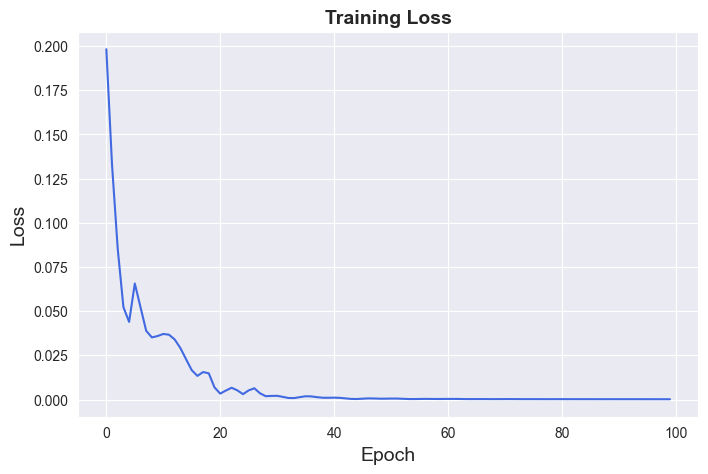

In [43]:
# Retraining our model with tuned parameters

#constant parameters as used in a vanilla RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_lstm_model['hidden_dim'])
num_layers = int(best_lstm_model['num_layers'])
time_step = int(best_lstm_model['time_step'])

#declaring the model
torch.manual_seed(42)
tuned_lstm = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tuned_lstm = to_device(tuned_lstm, device)

#training and evaluating model
evaluate_single_model(tuned_lstm, num_epochs, lr, loss_type, optimiser, time_step)

# GRU

In [44]:
class GRU_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(GRU_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        
        self.gru = nn.GRU(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [45]:
gc.collect()
torch.cuda.empty_cache()

Epoch  0 MSE:  0.16131965816020966
Epoch  1 MSE:  0.09328900277614594
Epoch  2 MSE:  0.0559578612446785
Epoch  3 MSE:  0.049417994916439056
Epoch  4 MSE:  0.058110807090997696
Epoch  5 MSE:  0.048981860280036926
Epoch  6 MSE:  0.03569253906607628
Epoch  7 MSE:  0.028032299131155014
Epoch  8 MSE:  0.02507423236966133
Epoch  9 MSE:  0.023225702345371246
Epoch  10 MSE:  0.01947355642914772
Epoch  11 MSE:  0.012878711335361004
Epoch  12 MSE:  0.005369936116039753
Epoch  13 MSE:  0.0020647882483899593
Epoch  14 MSE:  0.006729744374752045
Epoch  15 MSE:  0.0060033309273421764
Epoch  16 MSE:  0.0012745256535708904
Epoch  17 MSE:  0.0033107101917266846
Epoch  18 MSE:  0.006541148759424686
Epoch  19 MSE:  0.005410077050328255
Epoch  20 MSE:  0.0019687942694872618
Epoch  21 MSE:  0.0003440189466346055
Epoch  22 MSE:  0.0015516547719016671
Epoch  23 MSE:  0.0027826542500406504
Epoch  24 MSE:  0.002128559397533536
Epoch  25 MSE:  0.0008478052914142609
Epoch  26 MSE:  0.0004738937714137137
Epoch  2

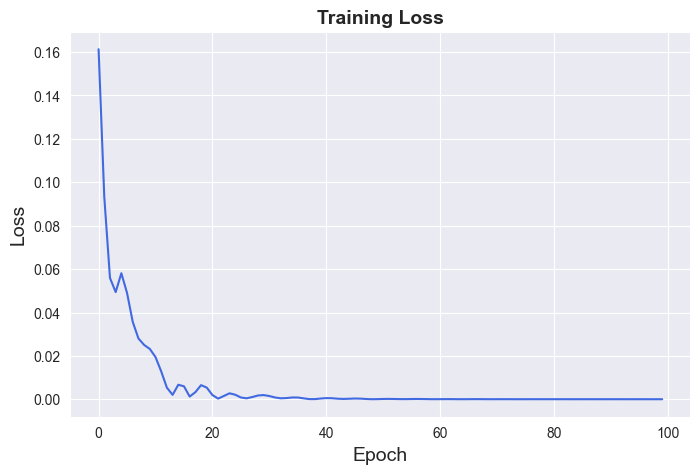

In [46]:
#parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_lstm_model['hidden_dim'])
num_layers = int(best_lstm_model['num_layers'])
time_step = int(best_lstm_model['time_step'])

#declaring the model
torch.manual_seed(42)
gru = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
gru = to_device(gru, device)

#training and evaluating model
evaluate_single_model(gru, num_epochs, lr, loss_type, optimiser, time_step)

In [47]:
gc.collect()
torch.cuda.empty_cache()

## Hyperparameter Tuning with GRU

In [48]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

GRU_results=[]

for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            gc.collect()
            torch.cuda.empty_cache()

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the model
            torch.manual_seed(42)
            gru_exp = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            gru_exp = to_device(gru_exp, device)

            #training and evaluating model
            GRU_res = evaluate_model_experiments(gru_exp, num_epochs, lr, loss_type, optimiser, time_step)
            GRU_results += [GRU_res.iloc[0]]
            print()


Time Step = 20 | Hidden States = 2 | Num Layers = 1

Epoch  0 MSE:  0.08259008824825287
Epoch  1 MSE:  0.074449323117733
Epoch  2 MSE:  0.07031219452619553
Epoch  3 MSE:  0.06900455057621002
Epoch  4 MSE:  0.06870201975107193
Epoch  5 MSE:  0.06800531595945358
Epoch  6 MSE:  0.06650535017251968
Epoch  7 MSE:  0.06435553729534149
Epoch  8 MSE:  0.06186390295624733
Epoch  9 MSE:  0.0593239963054657
Epoch  10 MSE:  0.05695387348532677
Epoch  11 MSE:  0.05486739054322243
Epoch  12 MSE:  0.053060680627822876
Epoch  13 MSE:  0.051423508673906326
Epoch  14 MSE:  0.04978802055120468
Epoch  15 MSE:  0.048003342002630234
Epoch  16 MSE:  0.04599872976541519
Epoch  17 MSE:  0.04380308836698532
Epoch  18 MSE:  0.041519325226545334
Epoch  19 MSE:  0.03927287831902504
Epoch  20 MSE:  0.03715577721595764
Epoch  21 MSE:  0.0351850800216198
Epoch  22 MSE:  0.033294372260570526
Epoch  23 MSE:  0.031369347125291824
Epoch  24 MSE:  0.029312560334801674
Epoch  25 MSE:  0.02709720842540264
Epoch  26 MSE:  0.

In [49]:
GRU_results = pd.DataFrame(GRU_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [50]:
GRU_results = GRU_results.sort_values('valScore', ascending=True, ignore_index = True)  
GRU_results

time_step  num_layers  hidden_dim  trainScore   valScore
0        20.0         1.0        32.0    0.472365   2.062092
1        30.0         1.0        32.0    0.465611   2.067532
2        50.0         1.0        32.0    0.466198   2.105028
3       100.0         1.0        32.0    0.468056   2.197709
4        30.0         2.0        32.0    0.484079   3.342293
5        20.0         2.0        32.0    0.550294   3.387487
6        50.0         2.0        32.0    0.482314   3.413553
7       100.0         2.0        32.0    0.484950   3.611060
8        20.0         1.0        16.0    0.605855   4.444937
9        30.0         1.0        16.0    0.604926   4.486647
10       50.0         1.0        16.0    0.604438   4.583097
11       20.0         1.0         8.0    0.632573   4.828670
12      100.0         1.0        16.0    0.603991   4.835273
13       30.0         1.0         8.0    0.632120   4.874910
14       50.0         1.0         8.0    0.632262   4.975376
15      100.0         1.0         8.0    0.630652   5.234551
16       20.0         2.0         8.0    0.722749   6.099448
17       30.0         2.0         8.0    0.719445   6.157511
18       50.0         2.0         8.0    0.721305   6.292237
19      100.0         2.0         8.0    0.727723   6.650363
20       30.0         2.0        16.0    0.586495   6.705276
21       20.0         2.0        16.0    0.617258   6.716288
22       50.0         2.0        16.0    0.595370   6.869364
23      100.0         2.0        16.0    0.599425   7.328953
24       20.0         1.0         2.0    0.822690   8.073862
25       30.0         1.0         2.0    0.821101   8.137066
26       50.0         1.0         2.0    0.818694   8.283643
27      100.0         1.0         2.0    0.814009   8.719790
28       20.0         1.0         4.0    1.134177  11.508539
29       30.0         1.0         4.0    1.128101  11.604121
30       50.0         1.0         4.0    1.126998  11.849094
31      100.0         1.0         4.0    1.124908  12.520383
32       30.0         2.0         2.0    1.069092  14.150194
33       20.0         2.0         2.0    1.163026  14.186088
34       50.0         2.0         2.0    1.041758  14.461113
35       20.0         2.0         4.0    1.871661  14.719043
36       30.0         2.0         4.0    1.850430  14.800913
37       50.0         2.0         4.0    1.840936  15.174061
38      100.0         2.0         2.0    1.052308  15.492349
39      100.0         2.0         4.0    1.868201  16.171383

In [51]:
best_gru_model = GRU_results.iloc[0]
best_gru_model

time_step     20.000000
num_layers     1.000000
hidden_dim    32.000000
trainScore     0.472365
valScore       2.062092
Name: 0, dtype: float64

Epoch  0 MSE:  0.1608825922012329
Epoch  1 MSE:  0.09307339042425156
Epoch  2 MSE:  0.05594881623983383
Epoch  3 MSE:  0.04952746629714966
Epoch  4 MSE:  0.058077141642570496
Epoch  5 MSE:  0.04895004257559776
Epoch  6 MSE:  0.03564896807074547
Epoch  7 MSE:  0.027956467121839523
Epoch  8 MSE:  0.02496788650751114
Epoch  9 MSE:  0.023085005581378937
Epoch  10 MSE:  0.019277304410934448
Epoch  11 MSE:  0.012613295577466488
Epoch  12 MSE:  0.005096983630210161
Epoch  13 MSE:  0.0020277732983231544
Epoch  14 MSE:  0.007005186285823584
Epoch  15 MSE:  0.0058099874295294285
Epoch  16 MSE:  0.0012382722925394773
Epoch  17 MSE:  0.0035414020530879498
Epoch  18 MSE:  0.006593862548470497
Epoch  19 MSE:  0.005242673214524984
Epoch  20 MSE:  0.001806069165468216
Epoch  21 MSE:  0.0003320844261907041
Epoch  22 MSE:  0.0016245584702119231
Epoch  23 MSE:  0.00280879158526659
Epoch  24 MSE:  0.002104955492541194
Epoch  25 MSE:  0.0008352474542334676
Epoch  26 MSE:  0.000493612140417099
Epoch  27 MSE

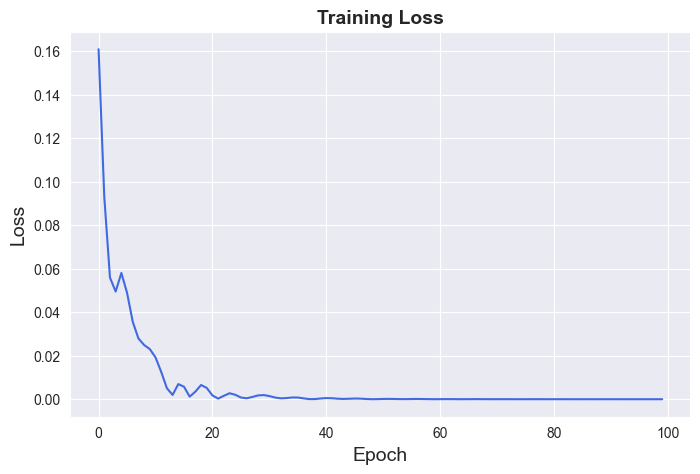

In [52]:
# Retraining our model with tuned parameters

#constant parameters as used in a vanilla RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_gru_model['hidden_dim'])
num_layers = int(best_gru_model['num_layers'])
time_step = int(best_gru_model['time_step'])

#declaring the model
torch.manual_seed(42)
tune_gru = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tune_gru = to_device(tune_gru, device)

#training and evaluating model
evaluate_single_model(tune_gru, num_epochs, lr, loss_type, optimiser, time_step)

# Testing the Final Model

Epoch  0 MSE:  0.20006981492042542
Epoch  1 MSE:  0.08839306235313416
Epoch  2 MSE:  0.04764170944690704
Epoch  3 MSE:  0.0806821882724762
Epoch  4 MSE:  0.06138111650943756
Epoch  5 MSE:  0.04455044865608215
Epoch  6 MSE:  0.04164819419384003
Epoch  7 MSE:  0.04378393292427063
Epoch  8 MSE:  0.04493849724531174
Epoch  9 MSE:  0.04267653450369835
Epoch  10 MSE:  0.03769125044345856
Epoch  11 MSE:  0.03198280557990074
Epoch  12 MSE:  0.028033707290887833
Epoch  13 MSE:  0.026908310130238533
Epoch  14 MSE:  0.02620520442724228
Epoch  15 MSE:  0.021144192665815353
Epoch  16 MSE:  0.013700210489332676
Epoch  17 MSE:  0.008794470690190792
Epoch  18 MSE:  0.0050465865060687065
Epoch  19 MSE:  0.000708980078343302
Epoch  20 MSE:  0.0034344703890383244
Epoch  21 MSE:  0.0022026204969733953
Epoch  22 MSE:  0.0047677308320999146
Epoch  23 MSE:  0.00442638760432601
Epoch  24 MSE:  0.0027219345793128014
Epoch  25 MSE:  0.002712736139073968
Epoch  26 MSE:  0.0006638854392804205
Epoch  27 MSE:  0.00

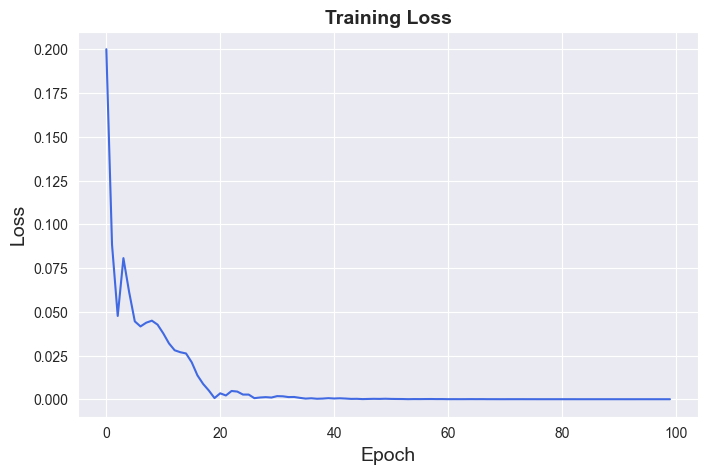

In [53]:
#parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_rnn_model['hidden_dim'])
num_layers = int(best_rnn_model['num_layers'])
time_step = int(best_rnn_model['time_step'])

#declaring the model
torch.manual_seed(42)
final_model = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
final_model = to_device(final_model, device)

#training and testing the best model
test_final_model(final_model, num_epochs, lr, loss_type, optimiser, time_step)

Visit https://nbviewer.org/github/Satpat/Sequential-networks-for-Stonks/blob/main/final_code_git.ipynb for viewing plotly graphs which plot the predictions.